# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pylab as pl

warnings.filterwarnings('ignore')
%matplotlib inline

import os
os.getcwd()

'/Users/michelle/Documents/Ironhack/dataV2-labs/dataV2-labs/module-2/Plotting-Multiple-Data-Series/your-code'

In [96]:
data = pd.read_csv('liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [23]:
item = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'ItemType']].groupby(['ItemType']).sum()
item

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


Text(0.5,0.98,'Sales per Item Type')

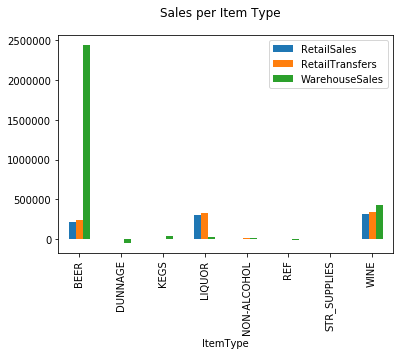

In [60]:
item.plot.bar()
plt.ylim()
pl.suptitle('Sales per Item Type')

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [51]:
top_10 = data[['Supplier', 'RetailSales', 'WarehouseSales']].groupby(['Supplier']).sum()
top_10['TotalSales'] = top_10.sum(axis=1)
top_10 = top_10.drop(columns=['RetailSales', 'WarehouseSales'])
top_10 = top_10.nlargest(10, 'TotalSales')
top_10

,TotalSales
Supplier,
MILLER BREWING COMPANY,607646.04
CROWN IMPORTS,606532.53
ANHEUSER BUSCH INC,536415.33
HEINEKEN USA,339735.76
E & J GALLO WINERY,143050.62
DIAGEO NORTH AMERICA INC,111909.24
CONSTELLATION BRANDS,99441.27
BOSTON BEER CORPORATION,64194.16
YUENGLING BREWERY,63433.67


Text(0.5,0.98,'Top 10 Suppliers')

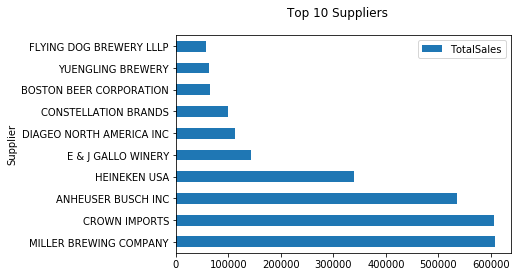

In [59]:
top_10.plot.barh()
pl.suptitle('Top 10 Suppliers')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [55]:
month = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'Month']].groupby(['Month']).mean()
month

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


Text(0.5,0.98,'Average per Month')

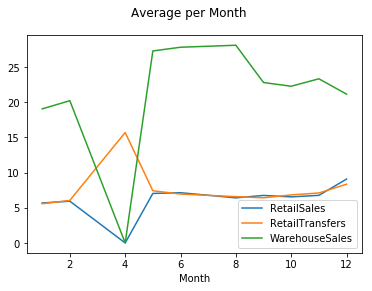

In [58]:
month.plot()
pl.suptitle('Average per Month')

## 4. Plot the same information as above but as a bar chart.

Text(0.5,0.98,'Average per Month')

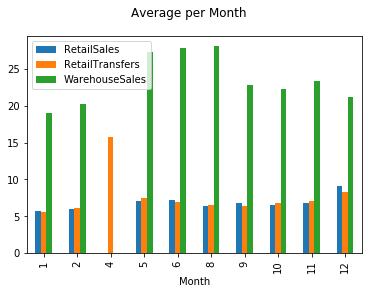

In [62]:
month.plot.bar()
pl.suptitle('Average per Month')

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [78]:
months = pd.pivot_table(data, index='Month', columns='ItemType', values='RetailSales')
months

ItemType,BEER,DUNNAGE,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
Month,,,,,,,,
1,9.728371,0.0,0.0,9.485519,10.313380,3.380000,5.176364,3.678568
2,10.688251,0.0,0.0,9.817050,10.289114,8.304000,4.776000,3.720824
4,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
5,14.455945,NaN,NaN,12.136614,NaN,NaN,NaN,3.913331
6,15.831398,0.0,0.0,11.937073,17.031408,6.120000,7.435000,3.964298
8,13.145051,0.0,0.0,11.090986,16.287761,3.908000,5.949231,3.689469
9,14.181189,0.0,0.0,11.191029,13.848750,5.554286,7.886667,3.990899
10,12.817128,0.0,0.0,11.021571,13.509000,3.260000,6.490769,3.957538
11,12.428722,0.0,0.0,11.774866,13.769726,9.015714,9.641818,4.211236


In [103]:
# no itemtypes Dunnage or Kegs are sold and therefore, I will fill the NaN values with 0
# could also be dropped, but these items might be sold in the future, to compare it would be nice to have these
# items also in this graph
month_5 = data[data.Month == 5]
month_5.groupby('ItemType').sum()
# month 5 also has NaN values for Non Alcohol, REF, STR_Supplies
# assuming these item types are not sold, but they are sold in other months, these NaN values can also be filled with 0
months = months.fillna(0)
months

ItemType,BEER,DUNNAGE,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
Month,,,,,,,,
1,9.728371,0.0,0.0,9.485519,10.313380,3.380000,5.176364,3.678568
2,10.688251,0.0,0.0,9.817050,10.289114,8.304000,4.776000,3.720824
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,14.455945,0.0,0.0,12.136614,0.000000,0.000000,0.000000,3.913331
6,15.831398,0.0,0.0,11.937073,17.031408,6.120000,7.435000,3.964298
8,13.145051,0.0,0.0,11.090986,16.287761,3.908000,5.949231,3.689469
9,14.181189,0.0,0.0,11.191029,13.848750,5.554286,7.886667,3.990899
10,12.817128,0.0,0.0,11.021571,13.509000,3.260000,6.490769,3.957538
11,12.428722,0.0,0.0,11.774866,13.769726,9.015714,9.641818,4.211236


Text(0.5,0.98,'Retail Sales by Item Type over Time')

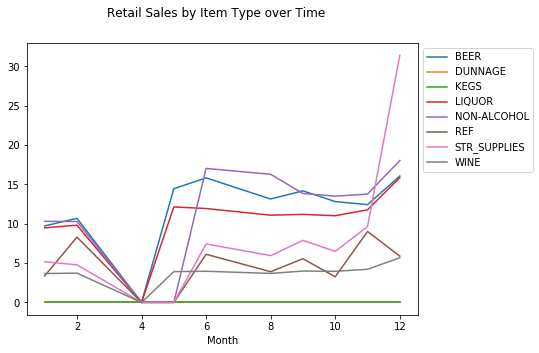

In [122]:
months.plot(figsize=[7,5])
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
pl.suptitle('Retail Sales by Item Type over Time')

## 6. Plot the same information as above but as a bar chart.

Text(0.5,0.98,'Retail Sales by Item Type over Time')

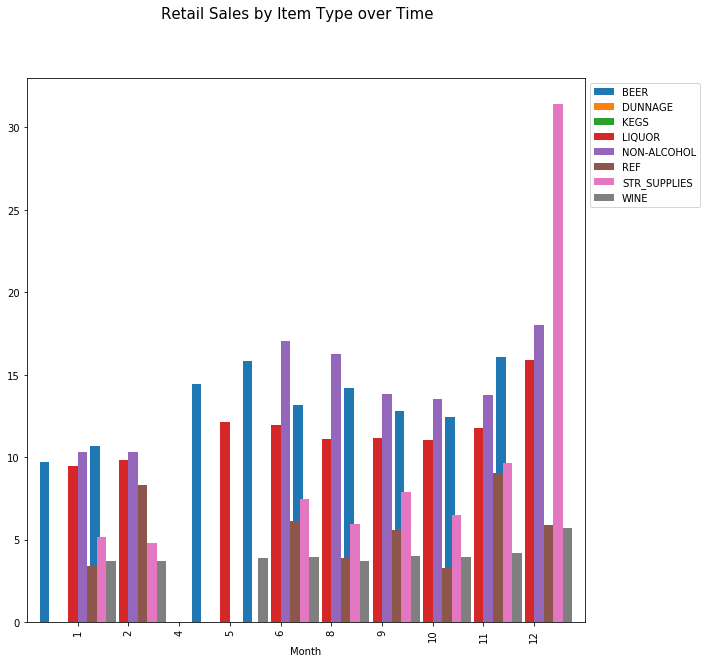

In [126]:
months.plot.bar(figsize=[10,10], width=1.5)
plt.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)
pl.suptitle('Retail Sales by Item Type over Time', fontsize=15)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

Text(0.5,0.98,'Relation Retail Sales and Retail Transfers by Item Type')

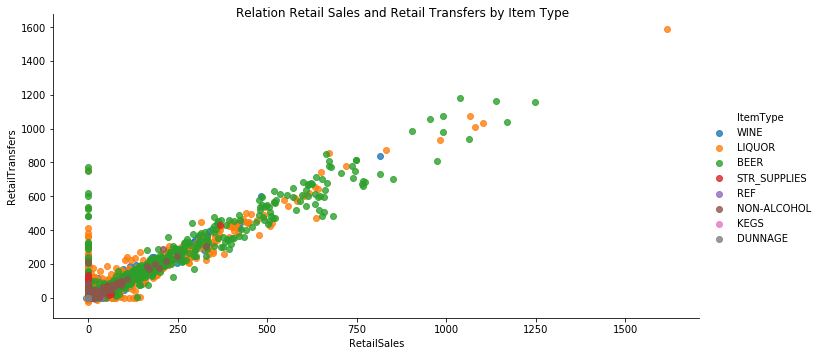

In [151]:
sns.lmplot(x="RetailSales", y="RetailTransfers", hue='ItemType', data=data, fit_reg=False, aspect=2)
pl.suptitle('Relation Retail Sales and Retail Transfers by Item Type')

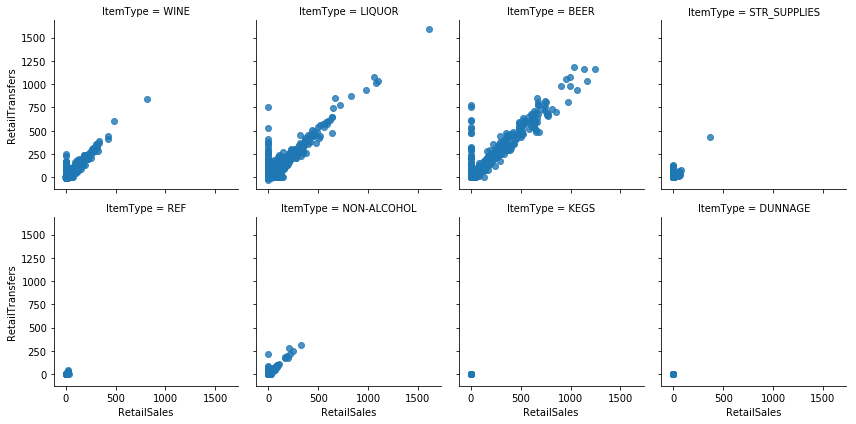

In [146]:
lm = sns.lmplot(x="RetailSales", y="RetailTransfers", col='ItemType', data=data, fit_reg=False, col_wrap=4, height=3)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [168]:
# data.columns
# scatter = data[['ItemType', 'RetailSales', 'RetailTransfers', 'WarehouseSales']]
# scatter
# sns.pairplot(scatter, hue='ItemType', aspect=2)

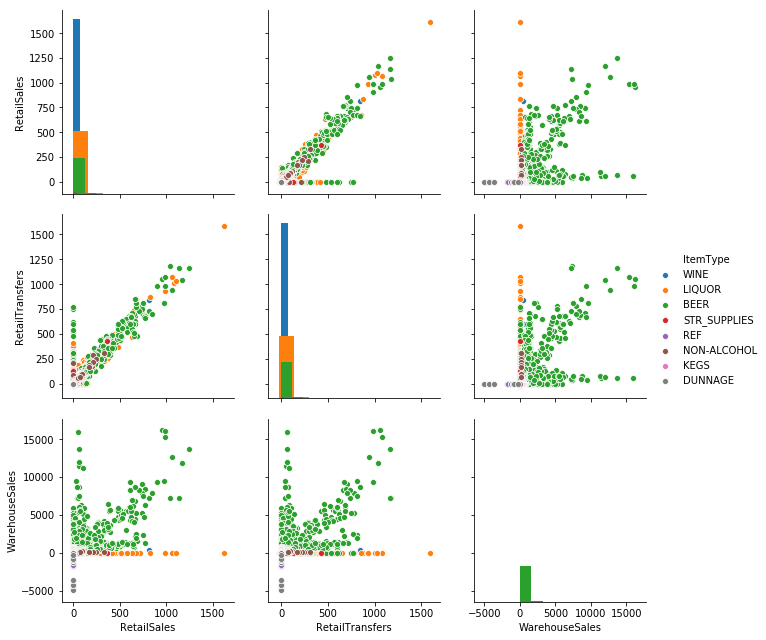

In [167]:
sns.pairplot(scatter, hue='ItemType', diag_kind="hist", height=3)